In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random

In [37]:
df = pd.read_csv("../data/kindle_data-v2.csv")
df.head(3)


,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships


In [38]:
def clean_dataset(df):
    df.drop(df[df["title"].isnull()].index, inplace=True)
    #df.drop(columns=['Unnamed: 0'], inplace=True)
    df = df.dropna(how="all", axis= 1)
    for column in df.columns:
        #print("Va por: ", column)
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
            df[column] = df[column].astype(str).str.strip()
            df.replace({'nan': np.nan}, inplace=True)
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    df.drop(df[df["title"].isnull()].index, inplace=True)
    df["author"] = np.where(df["author"] == "", "unknown", df["author"])  
    # para crear columna de año a partir de la de fecha de publicacion
    df["published_year"] = df["publisheddate"].str.split("-").str[0]
    df["published_year"] = df["published_year"].astype("Int64")
    # Nueva columna de rangos de décadas
    bins = [-float('inf'), 1989, 1994, 1999, 2004, 2009, 2014, 2019, float('inf')]
    labels = ['before 1990', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019', 'after 2019']
    df['year_range'] = pd.cut(df['published_year'], bins=bins, labels=labels)
    # para crear ranking por categoría
    # df_ranking = df.copy()
    # categories = df["category_name"].unique()
    # for categorie in categories:
    #     #print(categorie)
    #     df_categorie = df[df["category_name"] == categorie].copy()
    #     df_categorie = df_categorie.sort_values(by= ["reviews"], ascending= False)
    #     df_categorie["ranking_" + str(categorie)] = range(1, len(df_categorie) + 1)
    #     df_ranking = pd.merge(df_ranking,df_categorie, how="left")
    return df

df_kd = clean_dataset(df)  


In [39]:
df_kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   asin               133102 non-null  object  
 1   title              133102 non-null  object  
 2   author             132677 non-null  object  
 3   soldby             123869 non-null  object  
 4   imgurl             133102 non-null  object  
 5   producturl         133102 non-null  object  
 6   stars              133102 non-null  float64 
 7   reviews            133102 non-null  int64   
 8   price              133102 non-null  float64 
 9   iskindleunlimited  133102 non-null  bool    
 10  category_id        133102 non-null  int64   
 11  isbestseller       133102 non-null  bool    
 12  iseditorspick      133102 non-null  bool    
 13  isgoodreadschoice  133102 non-null  bool    
 14  publisheddate      84086 non-null   object  
 15  category_name      133102 non-null

In [40]:
# Inclusión de columna ranking que indica la posición actual de cada libro.
ranking = list(range(1,len(df_kd)+1))
df_kd["ranking_posic_inic"] = ranking
df_kd.head(3)

,asin,title,author,soldby,imgurl,producturl,stars,reviews,price,iskindleunlimited,category_id,isbestseller,iseditorspick,isgoodreadschoice,publisheddate,category_name,published_year,year_range,ranking_posic_inic
0,b00tze87s4,adult children of emotionally immature parents...,lindsay c. gibson,amazon.com services llc,https://m.media-amazon.com/images/i/713kztsayp...,https://www.amazon.com/dp/b00tze87s4,4.8,0,9.99,False,6,True,False,False,2015-06-01,parenting & relationships,2015,2015-2019,1
1,b08wcky8mb,"from strength to strength: finding success, ha...",arthur c. brooks,penguin group (usa) llc,https://m.media-amazon.com/images/i/a1lzcjfs9e...,https://www.amazon.com/dp/b08wcky8mb,4.4,0,16.99,False,6,False,False,False,2022-02-15,parenting & relationships,2022,after 2019,2
2,b09kps84cj,good inside: a guide to becoming the parent yo...,becky kennedy,harpercollins publishers,https://m.media-amazon.com/images/i/71riwm0sv6...,https://www.amazon.com/dp/b09kps84cj,4.8,0,16.99,False,6,False,True,False,2022-09-13,parenting & relationships,2022,after 2019,3


In [41]:
# al ver los duplicados han aparecido estas filas con título "not found", eliminar.
df_kd[df_kd["title"] == "not found"]

,asin,title,author,soldby,imgurl,producturl,stars,reviews,price,iskindleunlimited,category_id,isbestseller,iseditorspick,isgoodreadschoice,publisheddate,category_name,published_year,year_range,ranking_posic_inic
27975,b0c6jgj7rj,not found,NaN,NaN,no image found,https://www.amazon.com/dp/b0c6jgj7rj,0.0,0,0.0,False,26,False,False,False,NaN,"crafts, hobbies & home",<NA>,NaN,27976
132490,b07n5jq1j5,not found,NaN,NaN,no image found,https://www.amazon.com/dp/b07n5jq1j5,0.0,0,0.0,False,25,False,False,False,NaN,children's ebooks,<NA>,NaN,132491


In [42]:
df_kd.drop(index = [27975, 132490], inplace=True)

In [43]:
df_kd[df_kd["title"] == "not found"]

,asin,title,author,soldby,imgurl,producturl,stars,reviews,price,iskindleunlimited,category_id,isbestseller,iseditorspick,isgoodreadschoice,publisheddate,category_name,published_year,year_range,ranking_posic_inic


In [44]:
# para eliminar duplicados
df_duplicated = df_kd[df_kd["title"].duplicated()].sort_values(by= "author", ascending= True)

In [45]:
df_kd.drop(df_duplicated[df_duplicated["author"] == "Unknown"].index, inplace= True)

In [46]:
# para eliminar duplicados quedándonos con el primer año de publicación del mismo título
df_kd.sort_values(by="published_year", inplace=True)
df_kd.drop_duplicates("title", inplace=True)

In [47]:
# para eliminar todos aquellos que no tengan año de publicación
df_kd["published_year"].isnull()
df_kd.dropna(subset=["published_year"], inplace= True)

In [48]:
# para eliminar columnas innecesarias
df_kd.drop(df_kd.loc[:,["imgurl", "producturl","category_id","iseditorspick", "isgoodreadschoice"]], axis=1, inplace = True)

In [49]:
df_kd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83102 entries, 130517 to 128116
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   asin                83102 non-null  object  
 1   title               83102 non-null  object  
 2   author              83013 non-null  object  
 3   soldby              77038 non-null  object  
 4   stars               83102 non-null  float64 
 5   reviews             83102 non-null  int64   
 6   price               83102 non-null  float64 
 7   iskindleunlimited   83102 non-null  bool    
 8   isbestseller        83102 non-null  bool    
 9   publisheddate       83102 non-null  object  
 10  category_name       83102 non-null  object  
 11  published_year      83102 non-null  Int64   
 12  year_range          83102 non-null  category
 13  ranking_posic_inic  83102 non-null  int64   
dtypes: Int64(1), bool(2), category(1), float64(2), int64(2), object(6)
memory usage: 7.9+

In [50]:
# Para generar variable top_10 de categorías
top_10_categories = df_kd["category_name"].value_counts().nlargest(10).index
df_kd['category_top_10'] =  np.nan
df_kd['category_top_10'] = np.where(df_kd['category_name'].isna(), np.nan, np.where(df_kd['category_name'].isin(top_10_categories), df_kd['category_name'], 'others'))

In [51]:
df_kd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83102 entries, 130517 to 128116
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   asin                83102 non-null  object  
 1   title               83102 non-null  object  
 2   author              83013 non-null  object  
 3   soldby              77038 non-null  object  
 4   stars               83102 non-null  float64 
 5   reviews             83102 non-null  int64   
 6   price               83102 non-null  float64 
 7   iskindleunlimited   83102 non-null  bool    
 8   isbestseller        83102 non-null  bool    
 9   publisheddate       83102 non-null  object  
 10  category_name       83102 non-null  object  
 11  published_year      83102 non-null  Int64   
 12  year_range          83102 non-null  category
 13  ranking_posic_inic  83102 non-null  int64   
 14  category_top_10     83102 non-null  object  
dtypes: Int64(1), bool(2), category(1), 

In [52]:
# creación de un ranking según el número de reviews por categoría.
categories = df_kd["category_top_10"].unique()
for categorie in categories:
    #print(categorie)
    df_categorie = df_kd[df_kd["category_top_10"] == categorie].copy()
    df_categorie = df_categorie.sort_values(by= ["reviews"], ascending= False)
    df_categorie["ranking_" + str(categorie)] = range(1, len(df_categorie) + 1)
    #print(len(df_categorie))
    df_kd = pd.merge(df_kd,df_categorie, how="left")


### Hipótesis 1
Desde este dataset, vamos a sacar un histograma con la evolución de los títulos publicados por década (year_range)

In [53]:
# para una primera hipótesis, vamos a cargar el dataset filtrado anterior en una nueva variable
df_kd_h1 = df_kd.copy()

In [19]:
df_kd_h1.head(1)

,asin,title,author,soldby,stars,reviews,price,iskindleunlimited,isbestseller,publisheddate,...,ranking_science & math,ranking_others,ranking_biographies & memoirs,"ranking_crafts, hobbies & home",ranking_travel,ranking_parenting & relationships,ranking_law,ranking_engineering & transportation,"ranking_cookbooks, food & wine",ranking_computers & technology
0,b01k3lk4kg,percy jackson's greek gods by rick riordan (20...,NaN,NaN,4.8,0,14.9,False,False,1806-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Primero ordenamos los datos por año de publi, por si estuvieran desordenados
df_kd_h1.sort_values("published_year", ascending= True, inplace=True)

In [55]:
df_kd_h1.head(1)

,asin,title,author,soldby,stars,reviews,price,iskindleunlimited,isbestseller,publisheddate,...,ranking_science & math,ranking_others,ranking_biographies & memoirs,"ranking_crafts, hobbies & home",ranking_travel,ranking_parenting & relationships,ranking_law,ranking_engineering & transportation,"ranking_cookbooks, food & wine",ranking_computers & technology
0,b01k3lk4kg,percy jackson's greek gods by rick riordan (20...,NaN,NaN,4.8,0,14.9,False,False,1806-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Para graficar los datos referidos a publicaciones totales por década.
titles_decade_count = df_kd_h1.groupby("year_range")["title"].count().reset_index(name='title_count')

C:\Users\anusk\AppData\Local\Temp\ipykernel_36996\199855805.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titles_decade_count = df_kd_h1.groupby("year_range")["title"].count().reset_index(name='title_count')


In [57]:
titles_decade_count

,year_range,title_count
0,before 1990,279
1,1990-1994,186
2,1995-1999,437
3,2000-2004,1348
4,2005-2009,4746
5,2010-2014,13478
6,2015-2019,22520
7,after 2019,40108


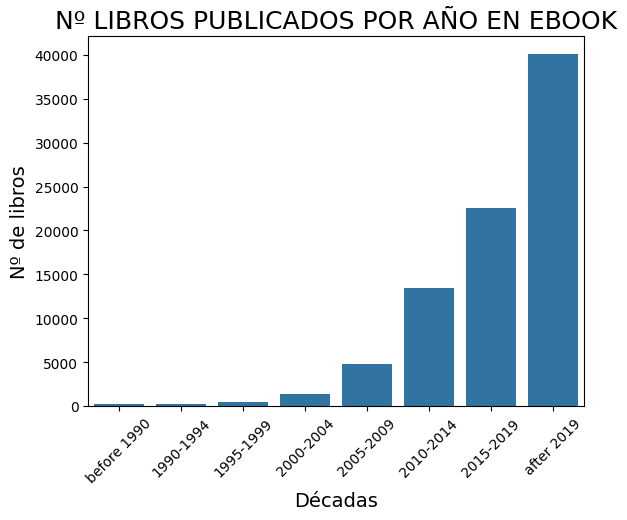

In [58]:
sns.barplot(titles_decade_count, x = "year_range", y = "title_count")
plt.xticks(rotation= 45)
plt.title('Nº LIBROS PUBLICADOS POR AÑO EN EBOOK', fontsize=18)
plt.xlabel('Décadas', fontsize=14)
plt.ylabel('Nº de libros', fontsize=14);

Otros análisis desde este dataset:

Primero vamos a obtener el número de libros publicado por género por cada década

In [59]:
generos_decada = df_kd_h1.groupby(["year_range","category_top_10"])["title"].size().reset_index(name='counts')

C:\Users\anusk\AppData\Local\Temp\ipykernel_36996\1523664628.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generos_decada = df_kd_h1.groupby(["year_range","category_top_10"])["title"].size().reset_index(name='counts')


In [60]:
generos_decada_piv = generos_decada.pivot(index='year_range', columns='category_top_10', values='counts')

In [61]:
# para ordenar los valores
category_totals = generos_decada_piv.sum().sort_values(ascending=False)
generos_decada_piv  = generos_decada_piv [category_totals.index]

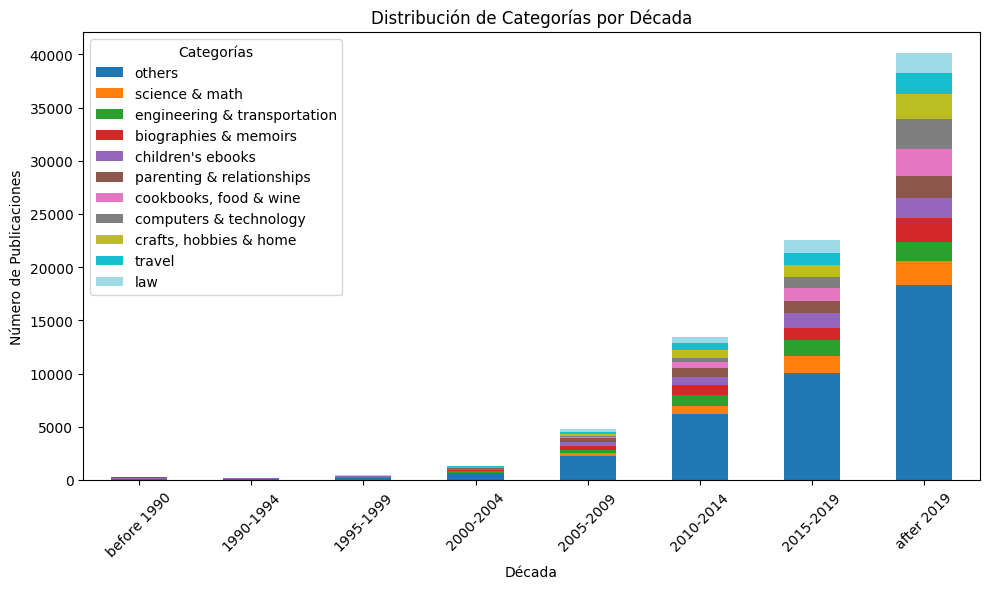

In [62]:
generos_decada_piv.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década')
plt.ylabel('Número de Publicaciones')
plt.xlabel('Década')
plt.xticks(rotation=45)
plt.legend(title='Categorías')
plt.tight_layout()
plt.show()

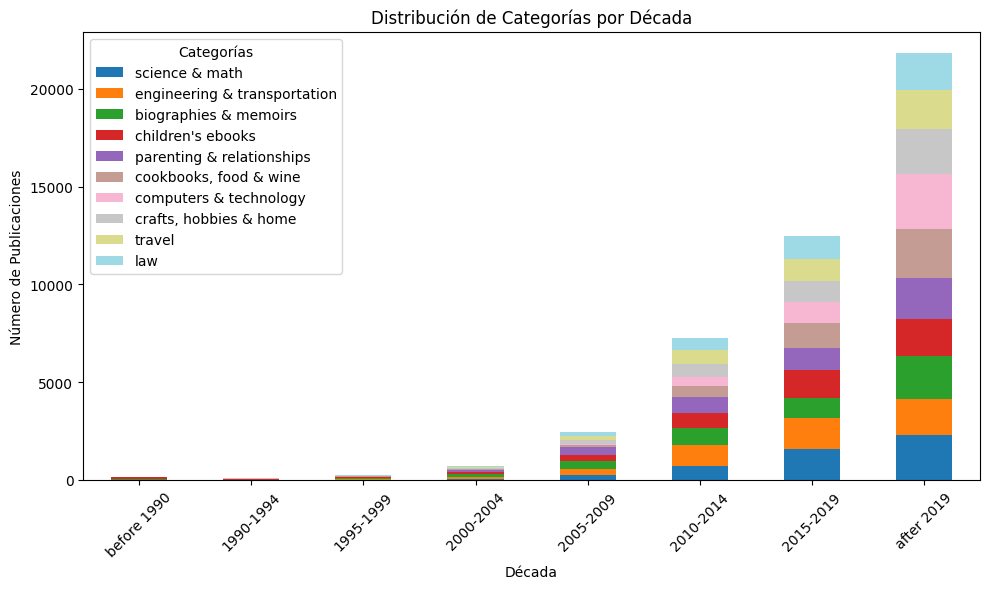

In [63]:
generos_decada_piv.iloc[:,1:].plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década')
plt.ylabel('Número de Publicaciones')
plt.xlabel('Década')
plt.xticks(rotation=45)
plt.legend(title='Categorías')
plt.tight_layout()
plt.show()

In [64]:
total = generos_decada_piv.sum().sum()
print("Total de libros: ", total)

Total de libros:  83102


Ahora vamos a pasarlo a %. para ver la distribución de los géneros por década.

In [65]:
totales_decada = generos_decada_piv.sum(axis=1)

In [66]:
generos_decada_per = generos_decada_piv.div(totales_decada, axis =0) * 100

In [67]:
generos_decada_per

category_top_10,others,science & math,engineering & transportation,biographies & memoirs,children's ebooks,parenting & relationships,"cookbooks, food & wine",computers & technology,"crafts, hobbies & home",travel,law
year_range,,,,,,,,,,,
before 1990,36.200717,3.942652,2.508961,5.376344,34.050179,3.584229,3.225806,0.716846,1.792115,4.301075,4.301075
1990-1994,48.924731,4.838710,3.225806,3.225806,16.129032,3.225806,2.688172,2.150538,5.913978,4.301075,5.376344
1995-1999,43.935927,3.203661,8.237986,6.178490,18.077803,4.805492,2.745995,2.059497,2.974828,4.118993,3.661327
2000-2004,47.848665,4.302671,7.047478,9.718101,10.756677,6.899110,1.409496,1.557864,2.818991,3.783383,3.857567
2005-2009,47.808681,5.520438,5.899705,8.870628,6.805731,7.985672,2.064897,2.001686,3.750527,4.761905,4.530131
2010-2014,46.312509,5.119454,8.102092,6.670129,5.460751,6.187862,4.140080,3.190384,5.245585,5.126873,4.444280
2015-2019,44.591474,7.113677,6.842806,4.746892,6.283304,5.031083,5.537300,4.733570,4.786856,5.071048,5.261989
after 2019,45.604368,5.707091,4.555201,5.564975,4.654932,5.225890,6.325421,6.976164,5.709584,5.011469,4.664905


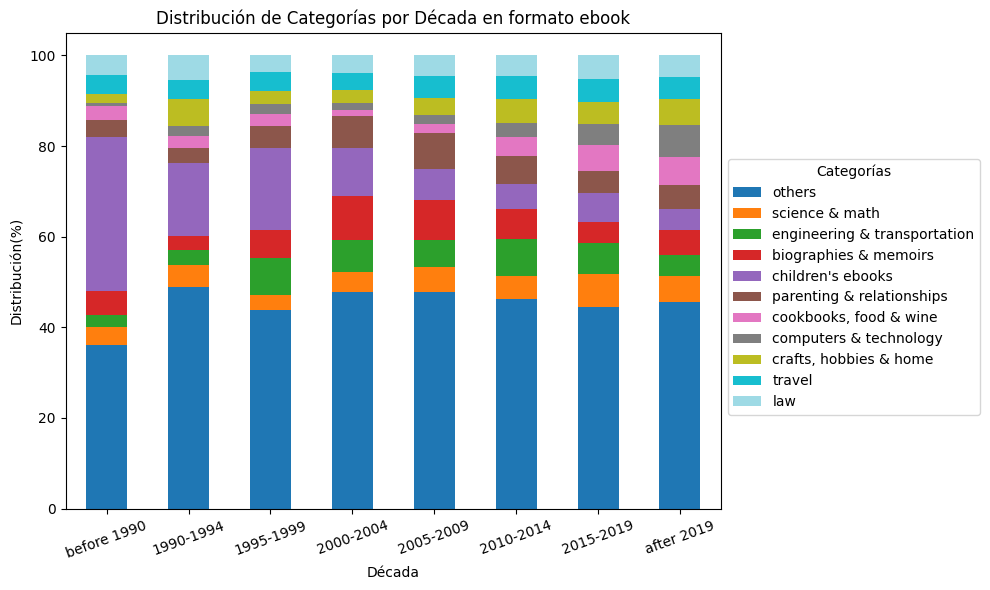

In [68]:
generos_decada_per.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década en formato ebook')
plt.ylabel('Distribución(%)')
plt.xlabel('Década')
plt.xticks(rotation=20)
plt.legend(title='Categorías',bbox_to_anchor=[1, 0.75], loc='upper left')
plt.tight_layout()
plt.show()


In [69]:
generos_decada_piv.sum(axis=1)

year_range
before 1990      279
1990-1994        186
1995-1999        437
2000-2004       1348
2005-2009       4746
2010-2014      13478
2015-2019      22520
after 2019     40108
dtype: int64

Ahora vamos a comprobar el número total de reviews por género

In [73]:
reviews_top10 = df_kd_h1.groupby("category_top_10")["reviews"].sum().reset_index(name='total_reviews')

In [76]:
top10cat_reviews = reviews_top10.sort_values(by="total_reviews", ascending=False)

In [86]:
# booksdataset vamos a ver si sacamos años de publicacion y categoría
bookdataset = "../data/BBDD_EDA/BooksDatasetClean.csv"
df = pd.read_csv(bookdataset)

def clean_bookdataset(df):
    for column in df.columns:
        #print("Va por: ", column)
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].astype(str).str.strip()
            #df[column] = df[column].str.strip()
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    for column in df.columns:
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
            df[column] = df[column].str.replace("by ", "")
            df[column] = df[column].str.replace("by", "")
            df[column] = df[column].str.replace("by", "")
            df.replace({'nan': np.nan}, inplace=True)
    # para eliminar lineas sin título        
    df.drop(df[df["title"] == ""].index, inplace=True)
    df["authors"] = np.where(df["authors"] == "", "unknown", df["authors"])    
    return df

df_bd = clean_bookdataset(df)

In [87]:
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103063 entries, 0 to 103062
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   title                    103063 non-null  object 
 1   authors                  103063 non-null  object 
 2   description              70204 non-null   object 
 3   category                 76902 non-null   object 
 4   publisher                103055 non-null  object 
 5   price_starting_with_($)  103063 non-null  float64
 6   publish_date_(month)     103063 non-null  object 
 7   publish_date_(year)      103063 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 6.3+ MB


In [88]:
# Para eliminar duplicados sin autor
df_duplicated = df_bd[df_bd["title"].duplicated()].sort_values(by= "authors", ascending= True)

In [89]:
df_duplicated.shape

(5954, 8)

In [90]:
df_bd.drop(df_duplicated[df_duplicated["authors"] == "Unknown"].index, inplace= True)

In [91]:
# para eliminar duplicados quedándonos con el primer año de publicación del mismo título
df_bd.sort_values(by="publish_date_(year)", inplace=True)
df_bd.drop_duplicates("title", inplace=True)

In [92]:
df_bd[df_bd["authors"] == "unknown"].head(1)

,title,authors,description,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year)
88283,better homes and gardens annual recipes 2009 (...,unknown,NaN,NaN,better homes and gardens,6.89,january,1828


In [93]:
df_bd.head(1)

,title,authors,description,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year)
45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",NaN,NaN,tfh publications,11.56,january,1755


In [94]:
# Dividir la columna 'category' por comas en un número dinámico de columnas
category_cols = df_bd['category'].str.split(',', expand=True)

# Eliminar espacios en blanco de las columnas resultantes
category_cols = category_cols.apply(lambda x: x.str.strip())

# Renombrar las columnas de categorías de forma dinámica
category_cols.columns = [f'category_{i+1}' for i in range(category_cols.shape[1])]

# Unir las nuevas columnas al DataFrame original
df_bd = pd.concat([df_bd, category_cols], axis=1)


In [95]:
df_bd["category_1"].value_counts()

category_1
fiction                            16857
juvenile fiction                    6406
religion                            4905
cooking                             3803
juvenile nonfiction                 3027
business & economics                2876
history                             2282
biography & autobiography           2050
political science                   1886
health & fitness                    1735
social science                      1665
travel                              1629
young adult fiction                 1464
family & relationships              1428
sports & recreation                 1217
self-help                           1209
humor                               1027
crafts & hobbies                     991
reference                            988
science                              983
house & home                         975
computers                            957
psychology                           928
medical                              771
garde

In [96]:
df_bd[df_bd["category_1"] == "fiction"]["category_2"].value_counts()

category_2
romance                           3122
general                           2342
mystery & detective               2268
thrillers                         1968
literary                          1464
science fiction                    837
historical                         684
fantasy                            614
classics                           348
christian                          322
religious                          285
short stories (single author)      252
women                              250
action & adventure                 228
humorous                           218
family life                        196
sagas                              152
psychological                      148
war & military                     141
anthologies (multiple authors)     134
westerns                           112
horror                             101
contemporary women                  91
political                           61
legal                               55
media tie-in  

In [97]:
df_bd["category_resumen_1"] = np.where(df_bd['category_1'] == 'fiction', df_bd['category_2'], df_bd['category_1'])

In [98]:
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'general', "literary & fiction", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'literary', "literary & fiction", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'thrillers', "mystery, thriller & suspense", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'mystery & detective', "mystery, thriller & suspense", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'christian', "religion & spirituality", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'religious', "religion & spirituality", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'religion', "religion & spirituality", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'political science', "politics & social sciences", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'social science', "politics & social sciences", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'historical', "history", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'crafts & hobbies', "crafts, hobbies & home", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'house & home', "crafts, hobbies & home", df_bd["category_resumen_1"])

In [99]:
df_bd["category_resumen_1"].value_counts().head(10)

category_resumen_1
juvenile fiction                6406
religion & spirituality         5512
mystery, thriller & suspense    4236
literary & fiction              3806
cooking                         3803
politics & social sciences      3551
romance                         3122
juvenile nonfiction             3027
history                         2966
business & economics            2876
Name: count, dtype: int64

In [100]:
# Para generar variable top_10 de categorías
top_10_categories = df_bd["category_resumen_1"].value_counts().nlargest(10).index
df_bd['category_top_10'] =  np.nan
df_bd['category_top_10'] = np.where(df_bd['category_resumen_1'].isna(), np.nan, np.where(df_bd['category_resumen_1'].isin(top_10_categories), df_bd['category_resumen_1'], 'others'))

In [101]:
# Nueva columna de rangos de décadas
bins = [-float('inf'), 1989, 1994, 1999, 2004, 2009, 2014, 2019, float('inf')]
labels = ['before 1990', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019', 'after 2019']

df_bd['year_range'] = pd.cut(df_bd['publish_date_(year)'], bins=bins, labels=labels)

In [102]:
df_bd.head(1)

,title,authors,description,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year),category_1,category_2,...,category_9,category_10,category_11,category_12,category_13,category_14,category_15,category_resumen_1,category_top_10,year_range
45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",NaN,NaN,tfh publications,11.56,january,1755,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,before 1990


In [103]:
# para eliminar las columnas de categorías a partir de la categoría 2. Esas no las vamos a tener en cuenta
df_bd.drop(df_bd.loc[:,"category_3":"category_15"], axis=1, inplace= True)

In [104]:
# para eliminar las otras columnas innecesarias para el análisis posterior
df_bd.drop(df_bd.loc[:,["description","category","publish_date_(month)", "category_1", "category_2" ]], axis=1, inplace= True)

In [105]:
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97109 entries, 45462 to 72814
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   title                    97109 non-null  object  
 1   authors                  97109 non-null  object  
 2   publisher                97101 non-null  object  
 3   price_starting_with_($)  97109 non-null  float64 
 4   publish_date_(year)      97109 non-null  int64   
 5   category_resumen_1       72046 non-null  object  
 6   category_top_10          72046 non-null  object  
 7   year_range               97109 non-null  category
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 6.0+ MB


### Hipótesis 1
Desde este dataset, vamos a sacar un histograma con la evolución de los títulos publicados por década (year_range)

In [106]:
# para una primera hipótesis, vamos a cargar el dataset filtrado anterior en una nueva variable
df_bd_h1 = df_bd.copy()

In [107]:
df_bd_h1.head(3)

,title,authors,publisher,price_starting_with_($),publish_date_(year),category_resumen_1,category_top_10,year_range
45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",tfh publications,11.56,1755,NaN,NaN,before 1990
100864,the rainy day book: pick-me-ups for when you'r...,mark gilroy communications,"j. countryman/thomas nelson, inc.",5.29,1787,NaN,NaN,before 1990
65356,how to be the funniest kid in the whole wide w...,jay leno,simon & schuster,5.29,1793,NaN,NaN,before 1990


In [108]:
# Primero ordenamos los datos por año de publi, por si estuvieran desordenados
df_bd_h1.sort_values("publish_date_(year)", ascending= True, inplace=True)

In [109]:
df_bd_h1.head(1)

,title,authors,publisher,price_starting_with_($),publish_date_(year),category_resumen_1,category_top_10,year_range
45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",tfh publications,11.56,1755,NaN,NaN,before 1990


In [110]:
# Para graficar los datos referidos a publicaciones totales por década.
titles_decade_count = df_bd_h1.groupby("year_range")["title"].count().reset_index(name='title_count')

C:\Users\anusk\AppData\Local\Temp\ipykernel_36996\4005696078.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titles_decade_count = df_bd_h1.groupby("year_range")["title"].count().reset_index(name='title_count')


In [111]:
titles_decade_count

,year_range,title_count
0,before 1990,25089
1,1990-1994,14175
2,1995-1999,19405
3,2000-2004,20300
4,2005-2009,15430
5,2010-2014,2491
6,2015-2019,164
7,after 2019,55


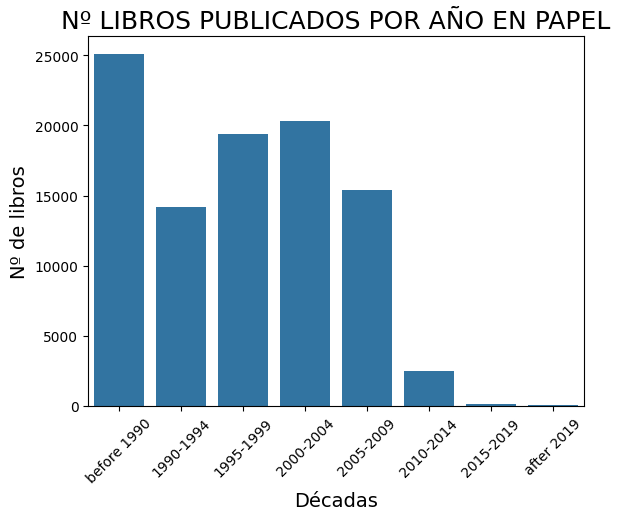

In [112]:
sns.barplot(titles_decade_count, x = "year_range", y = "title_count")
plt.xticks(rotation= 45)
plt.title('Nº LIBROS PUBLICADOS POR AÑO EN PAPEL', fontsize=18)
plt.xlabel('Décadas', fontsize=14)
plt.ylabel('Nº de libros', fontsize=14);


Otros análisis desde este dataset:


Primero vamos a obtener el número de libros publicado por género por cada década

In [113]:
generos_decada = df_bd_h1.groupby(["year_range","category_top_10"])["title"].size().reset_index(name='counts')

C:\Users\anusk\AppData\Local\Temp\ipykernel_36996\1900853679.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generos_decada = df_bd_h1.groupby(["year_range","category_top_10"])["title"].size().reset_index(name='counts')


In [114]:
generos_decada_piv = generos_decada.pivot(index='year_range', columns='category_top_10', values='counts')

In [115]:
generos_decada_piv

category_top_10,business & economics,cooking,history,juvenile fiction,juvenile nonfiction,literary & fiction,"mystery, thriller & suspense",others,politics & social sciences,religion & spirituality,romance
year_range,,,,,,,,,,,
before 1990,299,706,703,906,476,786,452,4979,623,859,67
1990-1994,514,779,505,751,537,784,419,4863,566,658,181
1995-1999,838,1017,578,1371,790,839,774,7769,639,1248,428
2000-2004,737,803,652,1741,832,813,1034,8060,784,1483,908
2005-2009,439,435,458,1414,347,486,1231,6025,813,1057,1221
2010-2014,42,60,65,169,35,88,318,974,123,191,308
2015-2019,5,2,5,32,8,5,3,63,3,13,6
after 2019,2,1,0,22,2,5,5,8,0,3,3


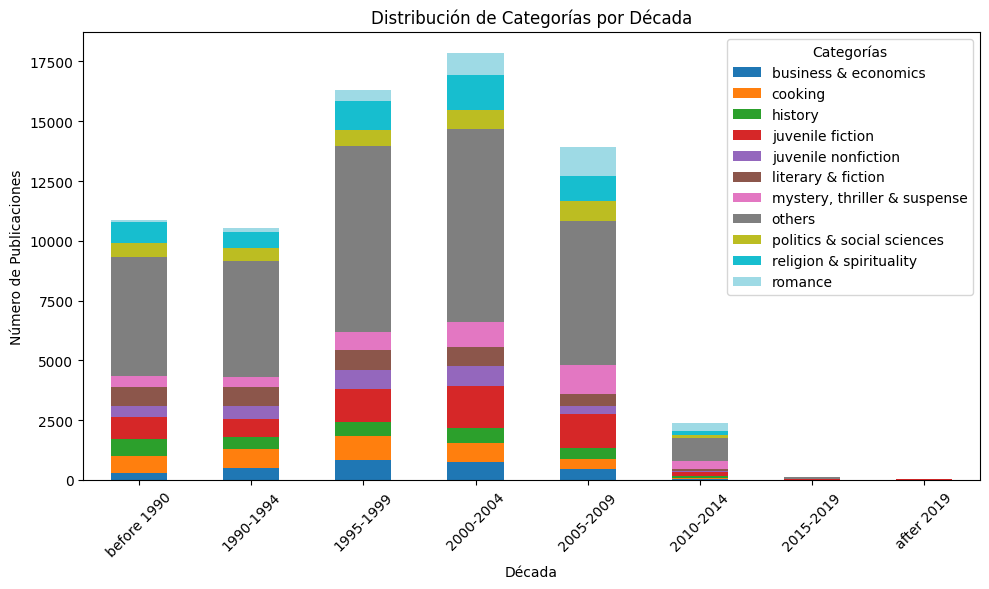

In [116]:
generos_decada_piv.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década')
plt.ylabel('Número de Publicaciones')
plt.xlabel('Década')
plt.xticks(rotation=45)
plt.legend(title='Categorías')
plt.tight_layout()
plt.show()

In [117]:
others_genre = generos_decada_piv["others"]
others_genre = others_genre.reset_index(name="others").set_index("year_range").T

In [118]:
others_genre

year_range,before 1990,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019,after 2019
others,4979,4863,7769,8060,6025,974,63,8


In [119]:
category_totals = generos_decada_piv.sum().sort_values(ascending=False)
generos_decada_piv  = generos_decada_piv [category_totals.index]

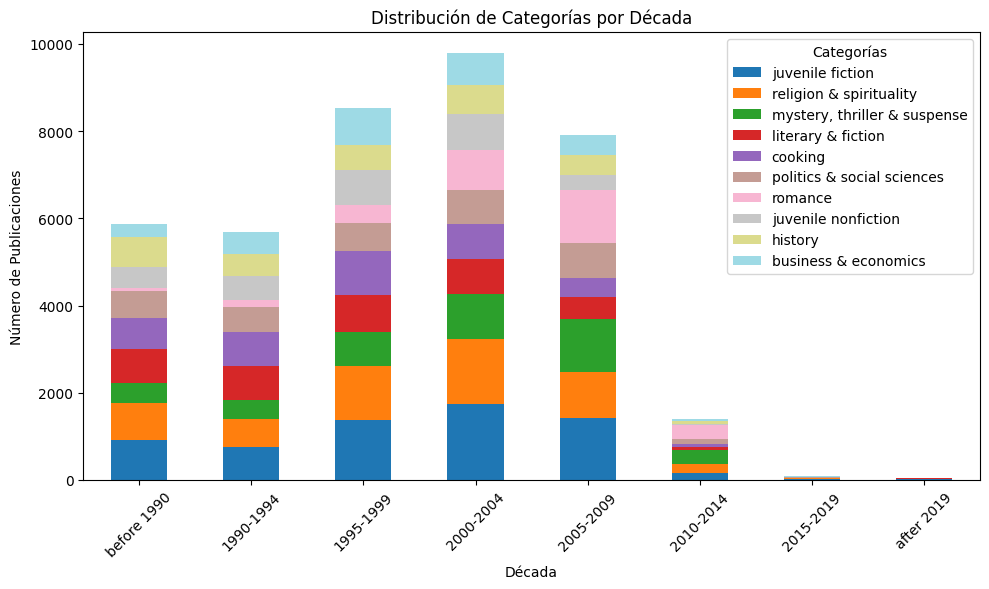

In [120]:
generos_decada_piv.iloc[:,1:].plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década')
plt.ylabel('Número de Publicaciones')
plt.xlabel('Década')
plt.xticks(rotation=45)
plt.legend(title='Categorías')
plt.tight_layout()
plt.show()

In [121]:
total = generos_decada_piv.sum().sum()
print("Total de libros: ", total)

Total de libros:  72046


Ahora vamos a pasarlo a %. para ver la distribución de los géneros por década.

In [122]:
totales_decada = generos_decada_piv.sum(axis=1)

In [123]:
generos_decada_per = generos_decada_piv.div(totales_decada, axis =0) * 100

In [124]:
generos_decada_per

category_top_10,others,juvenile fiction,religion & spirituality,"mystery, thriller & suspense",literary & fiction,cooking,politics & social sciences,romance,juvenile nonfiction,history,business & economics
year_range,,,,,,,,,,,
before 1990,45.864038,8.345615,7.912675,4.163596,7.240236,6.503316,5.738762,0.617170,4.384672,6.475682,2.754237
1990-1994,46.064223,7.113763,6.232831,3.968931,7.426352,7.378990,5.361372,1.714502,5.086672,4.783556,4.868807
1995-1999,47.688908,8.415690,7.660672,4.751090,5.150083,6.242711,3.922411,2.627217,4.849303,3.547971,5.143945
2000-2004,45.161652,9.755141,8.309520,5.793691,4.555387,4.499356,4.392895,5.087690,4.661848,3.653275,4.129546
2005-2009,43.264398,10.153669,7.590119,8.839581,3.489875,3.123654,5.838001,8.767773,2.491742,3.288812,3.152377
2010-2014,41.045091,7.121787,8.048883,13.400759,3.708386,2.528445,5.183312,12.979351,1.474926,2.739149,1.769912
2015-2019,43.448276,22.068966,8.965517,2.068966,3.448276,1.379310,2.068966,4.137931,5.517241,3.448276,3.448276
after 2019,15.686275,43.137255,5.882353,9.803922,9.803922,1.960784,0.000000,5.882353,3.921569,0.000000,3.921569


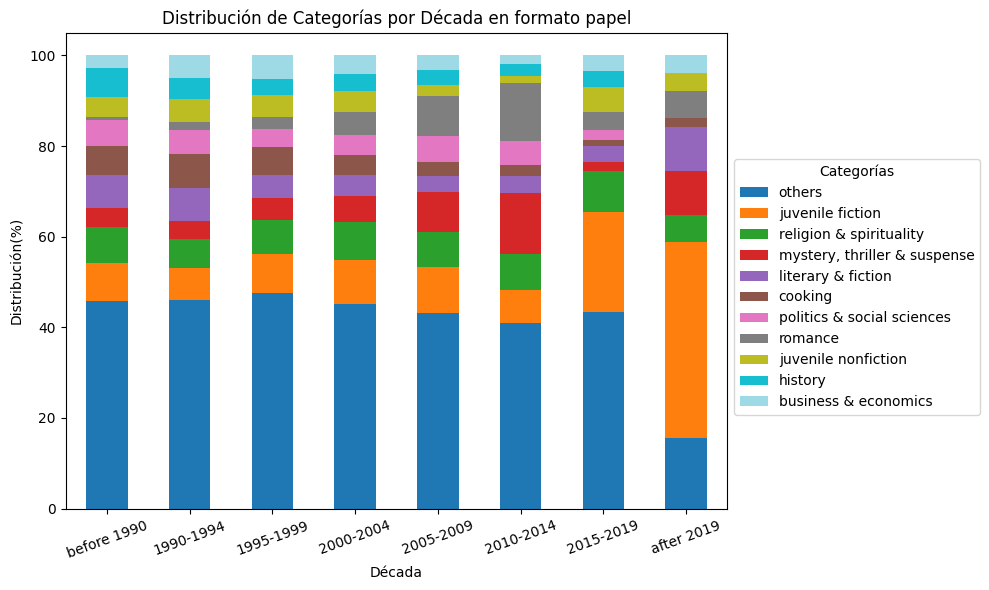

In [125]:
generos_decada_per.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década en formato papel')
plt.ylabel('Distribución(%)')
plt.xlabel('Década')
plt.xticks(rotation=20)
plt.legend(title='Categorías',bbox_to_anchor=[1, 0.75], loc='upper left')
plt.tight_layout()
plt.show()


In [126]:
generos_decada_piv.sum(axis=1)

year_range
before 1990    10856
1990-1994      10557
1995-1999      16291
2000-2004      17847
2005-2009      13926
2010-2014       2373
2015-2019        145
after 2019        51
dtype: int64

## Carga del dataset de amazon con el top 100 de ventas
Desde 2009 a 2021

In [127]:
amazon = pd.read_excel("../data/BBDD_EDA/Amazon_top100.xlsx")

def clean_top100amazon(df):
    df.drop(columns=['Unnamed: 0'], inplace=True)
    df = df.dropna(how="all", axis= 1)
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    for column in df.columns:
        if df[column].dtype == object:
            print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
            df[column] = df[column].astype(str).str.strip()
            df.replace({'nan': np.nan}, inplace=True)
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    # para eliminar lineas sin título        
    df.drop(df[df["title"] == ""].index, inplace=True)
    df.drop(df[df["title"].isnull()].index, inplace=True)
    return df

df_am= clean_top100amazon(amazon)

tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object


In [128]:
df_am.head(2)

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,12.49,1.0,the lost symbol,16118.0,4.4,dan brown,hardcover,2009,fiction
1,13.40,2.0,the shack: where tragedy confronts eternity,23392.0,4.7,william p. young,paperback,2009,fiction


In [129]:
# titulos iguales entre kindle y amazon
tit_kindle = df_kd_h1["title"].unique()
tit_amazon = df_am["title"].unique()
titulos_iguales_kam = [x for x in tit_amazon if x in tit_kindle]

In [130]:
len(titulos_iguales_kam)

277

In [131]:
df_am = df_am.merge(df_kd_h1[['title', 'category_top_10']], on='title', how='left')

In [132]:
df_am.head(2)

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,category_top_10
0,12.49,1.0,the lost symbol,16118.0,4.4,dan brown,hardcover,2009,fiction,NaN
1,13.40,2.0,the shack: where tragedy confronts eternity,23392.0,4.7,william p. young,paperback,2009,fiction,NaN


In [145]:
df_am = df_am.merge(df_bd_h1[['title', 'category_top_10']], on='title', how='left', suffixes=("", "_bd"))

In [147]:
df_am.head(2)

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,category_top_10,category_top_10_bd
0,12.49,1.0,the lost symbol,16118.0,4.4,dan brown,hardcover,2009,fiction,NaN,"mystery, thriller & suspense"
1,13.40,2.0,the shack: where tragedy confronts eternity,23392.0,4.7,william p. young,paperback,2009,fiction,NaN,religion & spirituality


In [148]:
df_am['category_combined'] = df_am['category_top_10'].combine_first(df_am['category_top_10_bd'])

In [160]:
cover_year = df_am.groupby(["year","cover_type"])["title"].count().unstack()

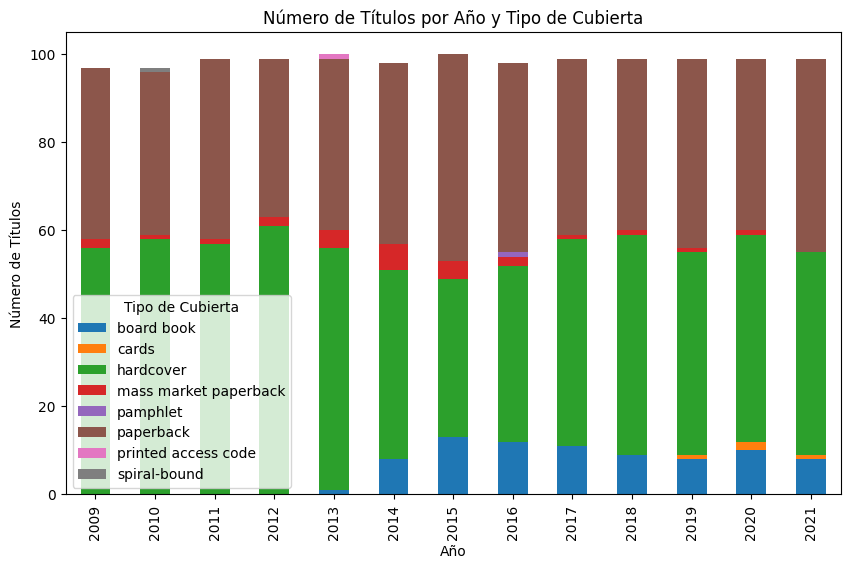

In [161]:
cover_year.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir etiquetas y título
plt.title('Número de Títulos por Año y Tipo de Cubierta')
plt.xlabel('Año')
plt.ylabel('Número de Títulos')
plt.legend(title='Tipo de Cubierta')

# Mostrar el gráfico
plt.show()

In [163]:
category_year = df_am.groupby(["year","category_combined"])["title"].count().unstack()

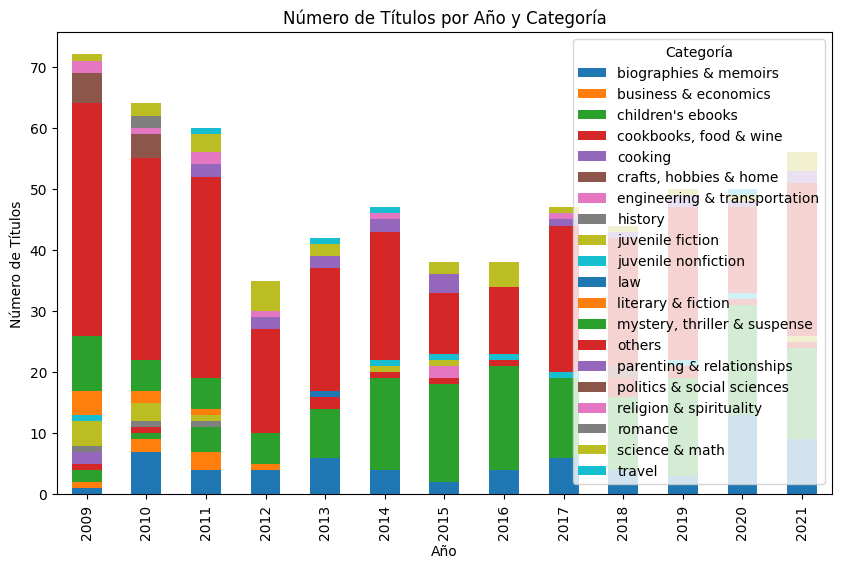

In [165]:
category_year.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir etiquetas y título
plt.title('Número de Títulos por Año y Categoría')
plt.xlabel('Año')
plt.ylabel('Número de Títulos')
plt.legend(title='Categoría')

# Mostrar el gráfico
plt.show()

In [133]:
# # para eliminar todos los ebooks con 20 reviews o menos.
# df.drop(df[df["reviews"] <= 20].index, inplace=True)

In [134]:
# df["reviews"].value_counts()

In [135]:
# df_kindle_ranking[df_kindle_ranking["ranking_" + str(categorie)] > 100].index

In [136]:
# para eliminar todos los libros que no estén en el ranking 100 de su categoría
# for categorie in categories:
#     df_kindle_ranking.drop(df_kindle_ranking[df_kindle_ranking["ranking_" + str(categorie)] > 100].index, inplace=True)

In [137]:
# df_kindle_ranking.describe()

In [138]:
# df_kindle_ranking.info()

In [139]:
# df_kindle_ranking.columns

In [140]:
# Creacion de nuevo dataframe con los 500 ebooks con más reviews.
# df_kindle_500 = df_kindle_ranking.sort_values(by= ["reviews"], ascending=False)[0:500].copy()


In [141]:
# df_kindle_500

In [142]:
# creación de nuevo dataframe filtrando por aquellos ebook son bestseller según la columna isBestSeller
# df_kindle_bestseller = df_kindle_ranking[df_kindle_ranking["isBestSeller"] == True].copy()

In [143]:
# # creación de un ranking según el número de reviews por categoría.
# categories = df["category_name"].unique()
# df_ranking = df.copy()
# for categorie in categories:
#     print(categorie)
#     df_categorie = df[df["category_name"] == categorie].copy()
#     df_categorie = df_categorie.sort_values(by= ["reviews"], ascending= False)
#     df_categorie["ranking_" + str(categorie)] = range(1, len(df_categorie) + 1)
#     df_ranking = pd.merge(df_ranking,df_categorie, how="left")

# # para eliminar todos los libros que no estén en el ranking 100 de su categoría
# for categorie in categories:
#     df_ranking.drop(df_ranking[df_ranking["ranking_" + str(categorie)] > 100].index, inplace=True)

# df.to_csv("../data/a_kindle100cat.csv")